<a href="https://www.kaggle.com/code/lordtenson/loan-approval-classifier-web-app-gradio?scriptVersionId=141853666" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Exploratory Data Analysis (EDA) 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the loan dataset
loan_df = pd.read_csv("/kaggle/input/loan-dataset/loan_data.csv")

loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [2]:
# Display the number of rows and columns in the dataset
print("Number of rows and columns:", loan_df.shape)

# Display summary statistics for numerical variables
print(loan_df.describe())

Number of rows and columns: (9578, 14)
       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.3756

In [3]:
# Display the number of missing values in each column
print(loan_df.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


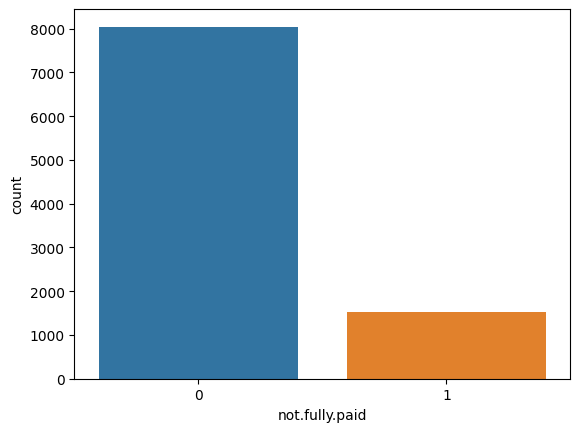

In [4]:
# Visualize the distribution of the target variable
sns.countplot(x="not.fully.paid", data=loan_df)
plt.show()

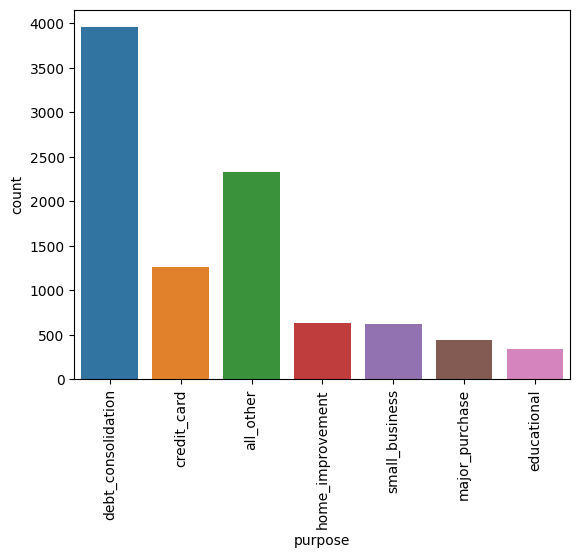

In [5]:
# Visualize the distribution of loan purpose
sns.countplot(x="purpose", data=loan_df)
plt.xticks(rotation=90)
plt.show()

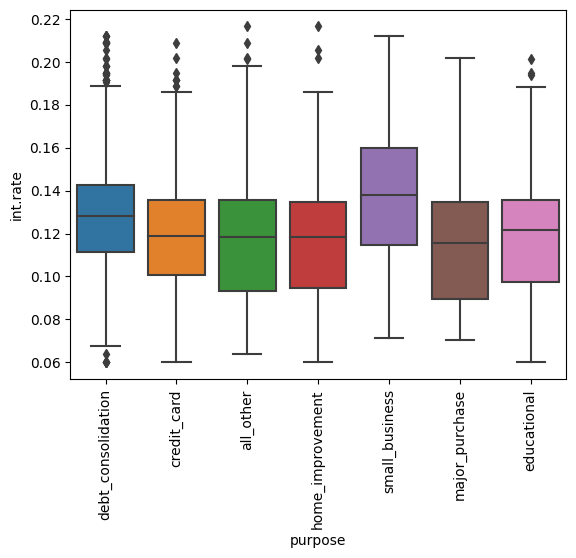

In [6]:
# Visualize the distribution of interest rates by loan purpose
sns.boxplot(x="purpose", y="int.rate", data=loan_df)
plt.xticks(rotation=90)
plt.show()

# Feature Engineering


In [7]:
# Perform feature engineering
loan_df["installment_to_income_ratio"] = (
    loan_df["installment"] / loan_df["log.annual.inc"]
)
loan_df["credit_history"] = (loan_df["delinq.2yrs"] + loan_df["pub.rec"]) / loan_df[
    "fico"
]

# Preprocessing and Balancing the Data


In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Drop unnecessary columns
loan_df = loan_df.drop(['credit.policy', 'days.with.cr.line', 'purpose'], axis=1)

# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
loan_df['not.fully.paid'] = le.fit_transform(loan_df['not.fully.paid'])

In [9]:
# Scale the numerical variables using StandardScaler
scaler = StandardScaler()
numerical_cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec','credit_history','installment_to_income_ratio']
loan_df[numerical_cols] = scaler.fit_transform(loan_df[numerical_cols])

In [10]:
# Handle class imbalance by oversampling the minority class
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X = loan_df.drop('not.fully.paid', axis=1)
y = loan_df['not.fully.paid']

X_resampled, y_resampled = sm.fit_resample(X, y)

loan_df = pd.concat([X_resampled, y_resampled], axis=1)

# Model Selection


In [11]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = loan_df.drop('not.fully.paid', axis=1)
y = loan_df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier
# Fit and evaluate decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)
print("Decision Tree Classifier Accuracy: {:.2f}%".format(dt_score*100))

Decision Tree Classifier Accuracy: 81.21%


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Fit and evaluate random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print("Random Forest Classifier Accuracy: {:.2f}%".format(rf_score*100))

Random Forest Classifier Accuracy: 89.14%


In [14]:
from sklearn.linear_model import LogisticRegression

# Fit and evaluate logistic regression classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print("Logistic Regression Classifier Accuracy: {:.2f}%".format(lr_score*100))

Logistic Regression Classifier Accuracy: 61.32%


In [15]:
from sklearn.svm import SVC

# Fit and evaluate support vector machine classifier
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
print("Support Vector Machine Classifier Accuracy: {:.2f}%".format(svm_score*100))

Support Vector Machine Classifier Accuracy: 66.54%


In [16]:
# we will be saving the best model (random forest : 89% ) using joblib. 
# We are doing that because we are going to create a web app using Gradio

import joblib
# Save the best model to disk
joblib.dump(rf, 'loan_classifier.joblib')
# Save the scalar to disk
joblib.dump(scaler, 'std_scaler.bin')




# you can check my github for full project to see how I used Gradio to make our model as a web app.
# link in bio

['std_scaler.bin']